# BERT Model

In [1]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import kagglehub
from kagglehub import KaggleDatasetAdapter


In [3]:
# Load pre-trained multilingual BERT model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [4]:
# Load and prepare dataset
file_path = "french_to_english_product.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dargolex/french-reviews-on-amazon-items-and-en-translation",
  file_path
)

from pathlib import Path

# Persist a local copy so other notebooks can reuse it
DATA_PATH = Path("../data/raw/french_to_english_product.csv")
DATA_PATH.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(DATA_PATH, index=False)
print(f"Saved dataset to: {DATA_PATH.resolve()}")

print("First 5 records:", df.head())

<ipython-input-4-e69debbf6285>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 23.7M/23.7M [00:00<00:00, 57.0MB/s]

Extracting zip of french_to_english_product.csv...


First 5 records:    rating                                             review  \
0       1  A déconseiller - Article n'a fonctionné qu'une...   
1       1  Si vous voulez être déçu achetez le produit ! ...   
2       1  Écran de mauvaise qualité, car il s'use en peu...   
3       1  Cet engin ne sert à rien les sons sont pourris...   
4       1  Très beau produit mais la grue n'a pas fonctio...   

                                         translation  
0  A discouragement - article Na worked that once...  
1  If you want to be disappointed buy the product...  
2  Screen of poor quality because it suses in a s...  
3  This machine does not serve the sounds are rot...  
4  Very nice product but the crane did not work v...  


In [5]:
# Balance the dataset
samples = []
for rating, size in zip([1, 2, 4, 5], [5000, 5000, 5000, 5000]):
    samples.append(df[df['rating'] == rating].sample(n=size, random_state=42))
samples.append(df[df['rating'] == 3].sample(n=10000, random_state=42))
df_balanced = pd.concat(samples).sample(frac=1, random_state=42).reset_index(drop=True)

# Convert ratings to 3-class sentiment
def convert_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df_balanced['sentiment'] = df_balanced['rating'].apply(convert_rating_to_sentiment)

In [6]:
# Split data
train_df, temp_df = train_test_split(df_balanced, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [7]:
# Define prediction helpers
def predict_probs(texts, batch_size=16):
    all_probs = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)
            probs = F.softmax(outputs.logits, dim=1).numpy()
            all_probs.extend(probs)
    return np.array(all_probs)

def convert_star_to_sentiment(pred):
    if pred in [0, 1]: return 0
    elif pred == 2: return 1
    else: return 2

In [8]:
# Predictions
# English
val_probs_en = predict_probs(val_df["translation"].tolist())
val_preds_en = [convert_star_to_sentiment(p) for p in np.argmax(val_probs_en, axis=1)]
val_df["predicted_sentiment_en"] = val_preds_en
val_df["confidence_en"] = val_probs_en.max(axis=1)

# French
val_probs_fr = predict_probs(val_df["review"].tolist())
val_preds_fr = [convert_star_to_sentiment(p) for p in np.argmax(val_probs_fr, axis=1)]
val_df["predicted_sentiment_fr"] = val_preds_fr
val_df["confidence_fr"] = val_probs_fr.max(axis=1)

100%|██████████| 282/282 [31:30<00:00,  6.70s/it]


# Results


Accuracy French:
0.7264444444444444

Accuracy English:
0.6973333333333334

The Multilingual BERT model for French:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      1501
           1       0.64      0.49      0.56      1462
           2       0.79      0.84      0.81      1537

    accuracy                           0.73      4500
   macro avg       0.72      0.72      0.72      4500
weighted avg       0.72      0.73      0.72      4500


Actual vs. Predicted Ratings – French:
       Actual Rating  Predicted Rating
29567              1                 0
17075              0                 0
28999              0                 0
1174               1                 1
18490              0                 2
6178               1                 1
6316               1                 0
19139              1                 1
8781               1                 2
7647               1                 0

The Multilingual BERT model for E

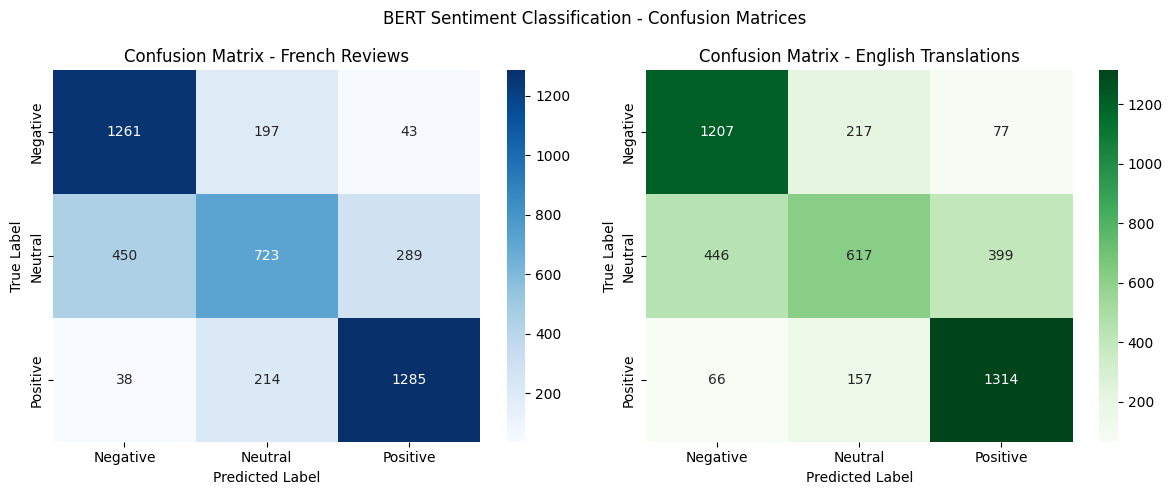

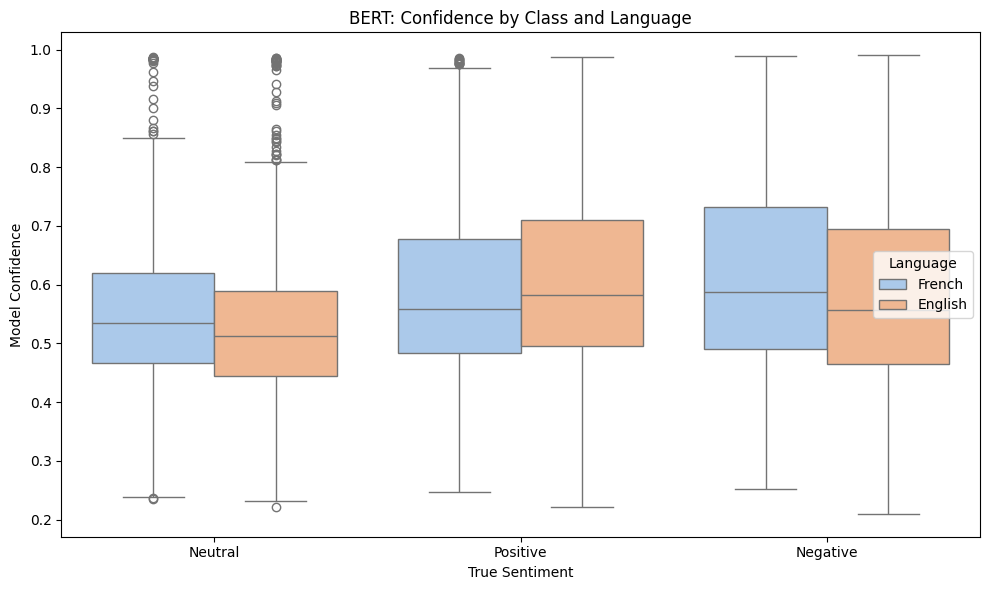

In [9]:
# Accuracy
fr_accuracy = accuracy_score(val_df["sentiment"], val_df["predicted_sentiment_fr"])
en_accuracy = accuracy_score(val_df["sentiment"], val_df["predicted_sentiment_en"])
print("\nAccuracy French:")
print(fr_accuracy)
print("\nAccuracy English:")
print(en_accuracy)

# Classification Report
report_en = pd.DataFrame(classification_report(val_df["sentiment"], val_df["predicted_sentiment_en"], output_dict=True)).transpose()
report_fr = pd.DataFrame(classification_report(val_df["sentiment"], val_df["predicted_sentiment_fr"], output_dict=True)).transpose()

print("\nThe Multilingual BERT model for French:")
print(classification_report(val_df["sentiment"], val_df["predicted_sentiment_fr"]))

fr_sample_preds = val_df[["sentiment", "predicted_sentiment_fr"]].sample(10, random_state=42)
fr_sample_preds.columns = ["Actual Rating", "Predicted Rating"]
print("\nActual vs. Predicted Ratings – French:")
print(fr_sample_preds)

print("\nThe Multilingual BERT model for English:")
print(classification_report(val_df["sentiment"], val_df["predicted_sentiment_en"]))

en_sample_preds = val_df[["sentiment", "predicted_sentiment_en"]].sample(10, random_state=42)
en_sample_preds.columns = ["Actual Rating", "Predicted Rating"]
print("\nActual vs. Predicted Ratings – English:")
print(en_sample_preds)

# Confusion Matrices
labels = ["Negative", "Neutral", "Positive"]
cm_fr = confusion_matrix(val_df["sentiment"], val_df["predicted_sentiment_fr"])
cm_en = confusion_matrix(val_df["sentiment"], val_df["predicted_sentiment_en"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_fr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - French Reviews")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_en, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - English Translations")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.suptitle("BERT Sentiment Classification - Confusion Matrices")
plt.tight_layout()
plt.savefig("confusion_matrix_french_vs_english.png")
plt.show()
plt.close()

# Confidence Boxplot by Class and Language
val_df["true_sentiment_label"] = val_df["sentiment"].map({0: "Negative", 1: "Neutral", 2: "Positive"})

df_conf_long = pd.DataFrame({
    "Confidence": val_df["confidence_fr"].tolist() + val_df["confidence_en"].tolist(),
    "Sentiment": val_df["true_sentiment_label"].tolist() * 2,
    "Language": ["French"] * len(val_df) + ["English"] * len(val_df)
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_conf_long, x="Sentiment", y="Confidence", hue="Language", palette="pastel")
plt.title("BERT: Confidence by Class and Language")
plt.xlabel("True Sentiment")
plt.ylabel("Model Confidence")
plt.legend(title="Language")
plt.tight_layout()
plt.savefig("boxplot_confidence_french_vs_english.png")
plt.show()
plt.close()

# Misclassified Examples
misclassified_en = val_df[val_df["sentiment"] != val_df["predicted_sentiment_en"]]
misclassified_fr = val_df[val_df["sentiment"] != val_df["predicted_sentiment_fr"]]

In [10]:
# Save reports
report_en.to_csv("classification_report_english.csv")
report_fr.to_csv("classification_report_french.csv")
fr_sample_preds.to_csv("sample_predictions_french.csv", index=False)
en_sample_preds.to_csv("sample_predictions_english.csv", index=False)
misclassified_en.to_csv("misclassified_english.csv", index=False)
misclassified_fr.to_csv("misclassified_french.csv", index=False)

# Full Predictions Export
val_df.to_csv("BERT_predictions_full.csv", index=False)

# Neutral Class Analysis

In [12]:
# English reviews predicted as neutral but were actually not neutral
wrong_as_neutral_en = val_df[(val_df["sentiment"] != 1) & (val_df["predicted_sentiment_en"] == 1)]
print(f"Number of reviews misclassified as neutral (English): {len(wrong_as_neutral_en)}")

# French reviews predicted as neutral but were actually not neutral
wrong_as_neutral_fr = val_df[(val_df["sentiment"] != 1) & (val_df["predicted_sentiment_fr"] == 1)]
print(f"Number of reviews misclassified as neutral (French): {len(wrong_as_neutral_fr)}")


Number of reviews misclassified as neutral (English): 374
Number of reviews misclassified as neutral (French): 411


In [13]:
import re
from collections import Counter

# Text cleaning function
def basic_clean(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# English
wrong_as_neutral_en["clean_text_en"] = wrong_as_neutral_en["translation"].apply(basic_clean)
all_words_en = " ".join(wrong_as_neutral_en["clean_text_en"]).split()
word_counts_en = Counter(all_words_en)
most_common_en = word_counts_en.most_common(10)

print("\n Top 10 words in English reviews misclassified as neutral:")
for word, count in most_common_en:
    print(f"{word}: {count}")

# French
wrong_as_neutral_fr["clean_text_fr"] = wrong_as_neutral_fr["review"].apply(basic_clean)
all_words_fr = " ".join(wrong_as_neutral_fr["clean_text_fr"]).split()
word_counts_fr = Counter(all_words_fr)
most_common_fr = word_counts_fr.most_common(10)

print("\n Top 10 words in French reviews misclassified as neutral:")
for word, count in most_common_fr:
    print(f"{word}: {count}")

# Save
pd.DataFrame(most_common_en, columns=["Word", "Count"]).to_csv("top_words_misclassified_as_neutral_en.csv", index=False)
pd.DataFrame(most_common_fr, columns=["Word", "Count"]).to_csv("top_words_misclassified_as_neutral_fr.csv", index=False)



 Top 10 words in English reviews misclassified as neutral:
the: 768
to: 314
a: 309
is: 265
not: 248
but: 218
and: 199
it: 199
of: 184
i: 182

 Top 10 words in French reviews misclassified as neutral:
de: 406
le: 347
la: 303
un: 265
pour: 258
pas: 257
mais: 251
et: 232
à: 201
les: 194


<ipython-input-13-1b720bb77c7c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_as_neutral_en["clean_text_en"] = wrong_as_neutral_en["translation"].apply(basic_clean)
<ipython-input-13-1b720bb77c7c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_as_neutral_fr["clean_text_fr"] = wrong_as_neutral_fr["review"].apply(basic_clean)


In [14]:
# English: True neutral, but predicted as non-neutral
wrong_neutral_en = val_df[(val_df["sentiment"] == 1) & (val_df["predicted_sentiment_en"] != 1)]
print(f"English: neutral reviews misclassified: {len(wrong_neutral_en)}")

wrong_neutral_en["clean_text_en"] = wrong_neutral_en["translation"].apply(basic_clean)
all_words_en_neu = " ".join(wrong_neutral_en["clean_text_en"]).split()
word_counts_en_neu = Counter(all_words_en_neu)
most_common_en_neu = word_counts_en_neu.most_common(30)

print("\n Top 30 words in neutral reviews misclassified (English):")
for word, count in most_common_en_neu:
    print(f"{word}: {count}")

pd.DataFrame(most_common_en_neu, columns=["Word", "Count"]).to_csv("top_words_true_neutral_misclassified_en.csv", index=False)

# French: True neutral, but predicted as non-neutral
wrong_neutral_fr = val_df[(val_df["sentiment"] == 1) & (val_df["predicted_sentiment_fr"] != 1)]
print(f"French: neutral reviews misclassified: {len(wrong_neutral_fr)}")

wrong_neutral_fr["clean_text_fr"] = wrong_neutral_fr["review"].apply(basic_clean)
all_words_fr_neu = " ".join(wrong_neutral_fr["clean_text_fr"]).split()
word_counts_fr_neu = Counter(all_words_fr_neu)
most_common_fr_neu = word_counts_fr_neu.most_common(30)

print("\n Top 30 words in neutral reviews misclassified (French):")
for word, count in most_common_fr_neu:
    print(f"{word}: {count}")

pd.DataFrame(most_common_fr_neu, columns=["Word", "Count"]).to_csv("top_words_true_neutral_misclassified_fr.csv", index=False)


English: neutral reviews misclassified: 845

 Top 30 words in neutral reviews misclassified (English):
the: 1542
to: 656
a: 572
not: 535
is: 485
and: 471
i: 411
of: 399
for: 362
it: 359
in: 319
very: 274
but: 259
that: 241
on: 201
my: 197
this: 196
with: 178
product: 156
good: 140
are: 136
have: 129
its: 127
at: 124
does: 118
do: 114
be: 102
well: 98
you: 98
was: 92
French: neutral reviews misclassified: 739

 Top 30 words in neutral reviews misclassified (French):
de: 683
le: 594
la: 507
pas: 452
et: 418
à: 347
pour: 326
un: 324
je: 310
est: 288
en: 266
les: 262
ne: 256
mais: 234
très: 225
a: 213
que: 209
il: 197
produit: 171
du: 169
ce: 165
une: 156
sur: 150
bien: 143
plus: 139
des: 139
au: 128
qui: 125
dans: 124
jai: 105


<ipython-input-14-9401d7c5a10a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_neutral_en["clean_text_en"] = wrong_neutral_en["translation"].apply(basic_clean)
<ipython-input-14-9401d7c5a10a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_neutral_fr["clean_text_fr"] = wrong_neutral_fr["review"].apply(basic_clean)
